In [23]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [24]:
train = pd.read_csv("./data/fashion-mnist_train.csv")
test = pd.read_csv("./data/fashion-mnist_test.csv")
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [25]:
x_train, y_train = train.loc[:, train.columns != 'label']/255, train['label']
x_test, y_test = test.loc[:, test.columns != 'label']/255, test['label']

epochs = 1000

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.Input((784,)),
  tf.keras.layers.Dense(392, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(392, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation='softmax')
])

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=50, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [35]:
history = model.fit(x_train, y_train, batch_size=3, validation_split=0.5, epochs=epochs, verbose=1, callbacks=[early_stopping])
model.evaluate(x_test,  y_test, verbose=2) 

Epoch 1/1000
 1214/15000 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 1.5061 - sparse_categorical_accuracy: 0.5376

KeyboardInterrupt: 

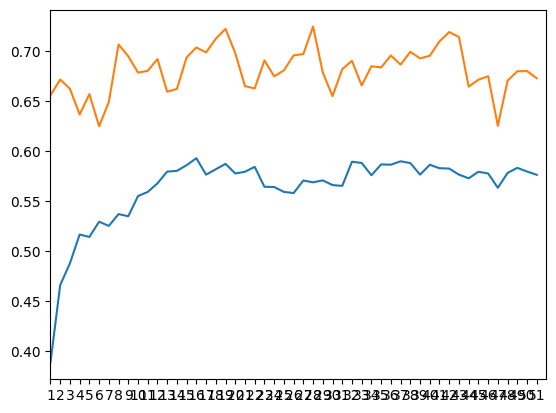

In [28]:
loss = history.history['loss']
accuracy = history.history['sparse_categorical_accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_sparse_categorical_accuracy']

passed = len(loss)
t = np.arange(0, passed, 1)

fig, ax = plt.subplots()
ax.plot(t, accuracy)
ax.plot(t, val_accuracy)
ax.set(xlim=(0,passed), xticks=t, xticklabels=t+1)


plt.show()

## Czytanki
* https://medium.com/@learnwithwhiteboard_digest/8-tips-on-how-to-choose-neural-network-architecture-e50590e99ab1
* https://arxiv.org/pdf/1206.5533